# TENSORFLOW

In [1]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.4.1'

In [3]:
keras.__version__

'2.4.0'

### import and split

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

### validation set (scales)

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

### labels

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]


'Coat'

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

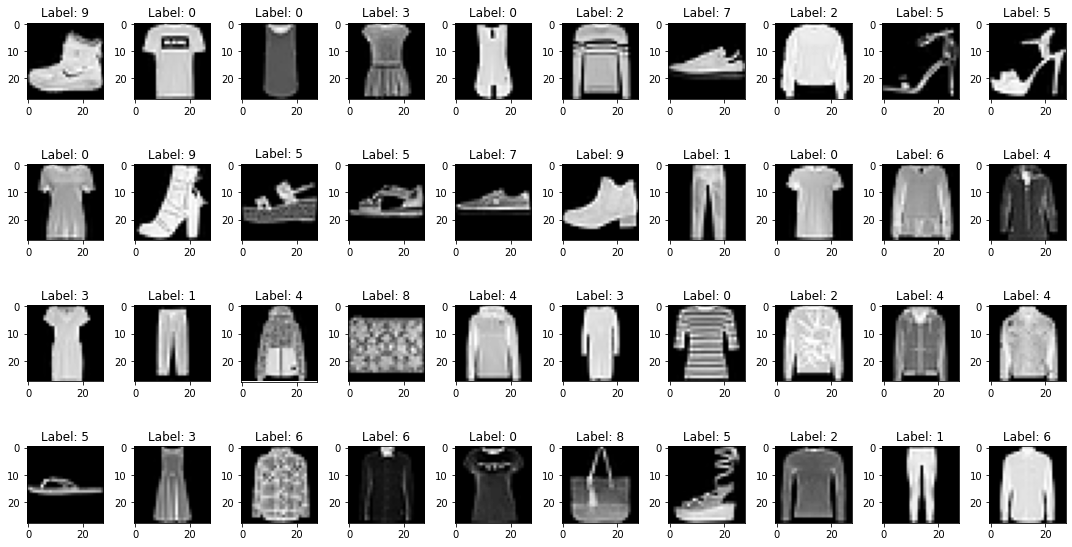

In [10]:
# specify the number of rows and columns you want to see
num_row = 4
num_col = 10

# get a segment of the dataset
num = num_row * num_col
images = X_train_full[:num]
labels = y_train_full[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i % num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()


### creating the model using the Sequential API

In [28]:
model = keras.models.Sequential([
    # keras.layers.InputLayer(input_shape=[28, 28]),
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_31 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_32 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.layers

In [22]:
hidden1 = model.layers[1]

model.get_layer('dense') is hidden1


True

In [23]:
weights, biases = hidden1.get_weights()
weights


array([[ 0.04328676, -0.04051418, -0.05429435, ...,  0.00699354,
         0.05056078, -0.02956822],
       [-0.03976148, -0.07051896, -0.06843307, ...,  0.03073283,
        -0.03828015,  0.02513308],
       [ 0.06920332,  0.04186417, -0.06108037, ...,  0.00550835,
         0.06032909,  0.01959439],
       ...,
       [ 0.06918781,  0.05730952, -0.00718959, ..., -0.06564005,
        -0.05653724, -0.04845222],
       [-0.01189348,  0.00916455, -0.01360745, ...,  0.00494751,
        -0.04837209,  0.05224018],
       [-0.03427232,  0.06107157, -0.03975159, ..., -0.04620355,
        -0.06353872,  0.04487677]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape


(300,)

### Compiling the model

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Training and evaluating the model

In [32]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 22s 11ms/step - loss: 0.9639 - accuracy: 0.6911 - val_loss: 0.5317 - val_accuracy: 0.8222
Epoch 2/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.4970 - accuracy: 0.8259 - val_loss: 0.4581 - val_accuracy: 0.8450
Epoch 3/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.4481 - accuracy: 0.8429 - val_loss: 0.4190 - val_accuracy: 0.8568
Epoch 4/30
1719/1719 [==============================] - 20s 11ms/step - loss: 0.4052 - accuracy: 0.8576 - val_loss: 0.3907 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 23s 13ms/step - loss: 0.3978 - accuracy: 0.8581 - val_loss: 0.4051 - val_accuracy: 0.8596
Epoch 6/30
1719/1719 [==============================] - 24s 14ms/step - loss: 0.3782 - accuracy: 0.8650 - val_loss: 0.3698 - val_accuracy: 0.8704
Epoch 7/30
1719/1719 [==============================] - 24s 14ms/step - loss: 0.3653 - accuracy: 0.8695 - val_loss: 0.3670 -

### Learning curves

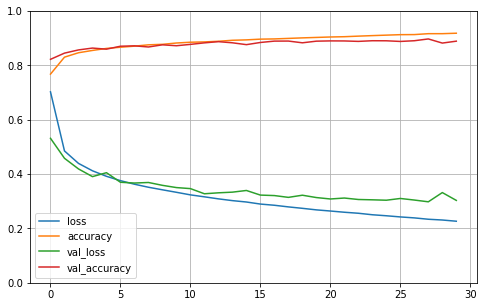

In [33]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()


### test

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 10ms/step - loss: 60.4507 - accuracy: 0.8552


[60.45074462890625, 0.8551999926567078]

### predictions

In [36]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [38]:
import numpy as np

y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')